# Exploratory Data Analysis (EDA)

**Objective**: This notebook outlines the first phase of my sales forecasting project. The primary goal is to load, inspect, and visualize the store-item demand data to uncover underlying patterns, trends, and seasonality. The insights gathered here will inform my feature engineering and modeling strategy in the next phase.

In [1]:
import pandas as pd

# Load the training data
df = pd.read_csv('../data/train.csv')

In [2]:
# Convert 'date' to datetime object
df['date'] = pd.to_datetime(df['date'])

# Create new features from the date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek   # Monday=0, Sunday=6

# Check that the new columns were added
df.head()

,date,store,item,sales,year,month,dayofweek
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots

sns.set_style('whitegrid')

## Overall Sales Trend

Plotting the total sales over time to help identify overall growth.

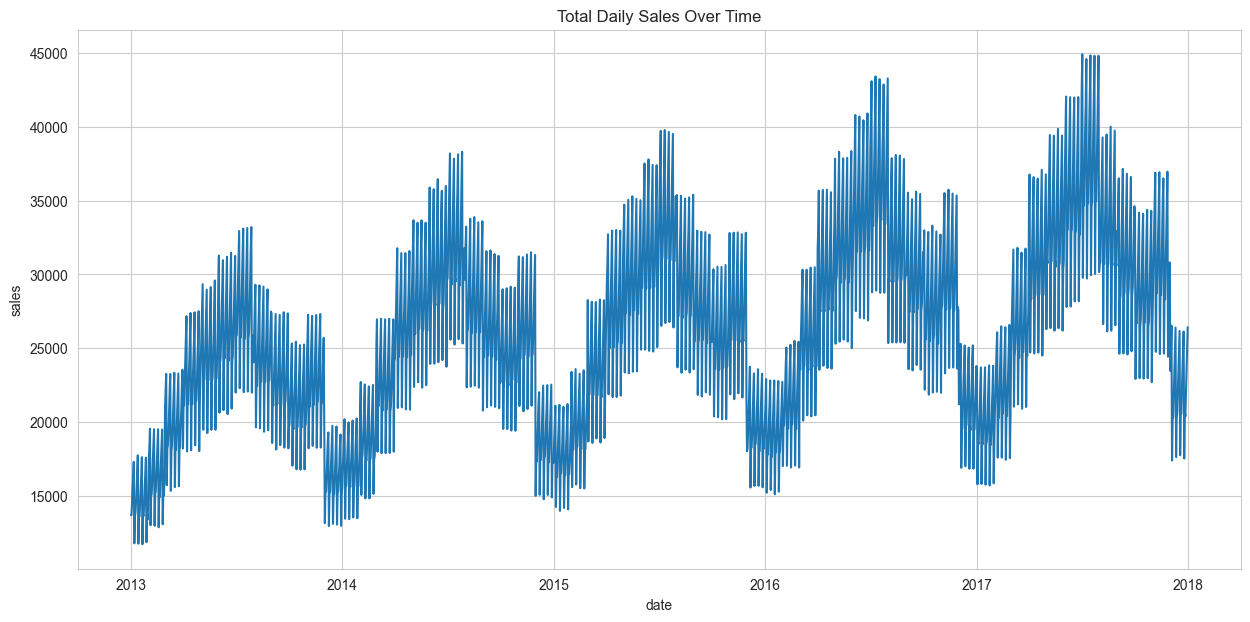

In [4]:
# Aggregate sales by date to see the bigger picture
daily_sales = df.groupby('date')['sales'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(15, 7))
sns.lineplot(x='date', y='sales', data=daily_sales)
plt.title('Total Daily Sales Over Time')
plt.show()

### Analysis of Overall Sales Trend

The chart reveals two key patters in the sales data:

1. **Consistent Upward Trend**: There is a clear year-over-year growth. The sales floor and celing are progressively higher each year, indicating the business is expanding.

2. **Strong Annual Sesonality**: Sales follow a predictable yearly cycle, peaking during the summer months and hitting a low point in the winter.

The dense fluctuations also suggest a strong weekly pattern. These insights are important for the forecasting model, which must account for both long-term growth and seasonal effects. These patterns are explored in more detail below.

## Monthly and Weekly Seasonality

Using boxplots to help identify if sales data are higher during certain months or on specific days of the week.

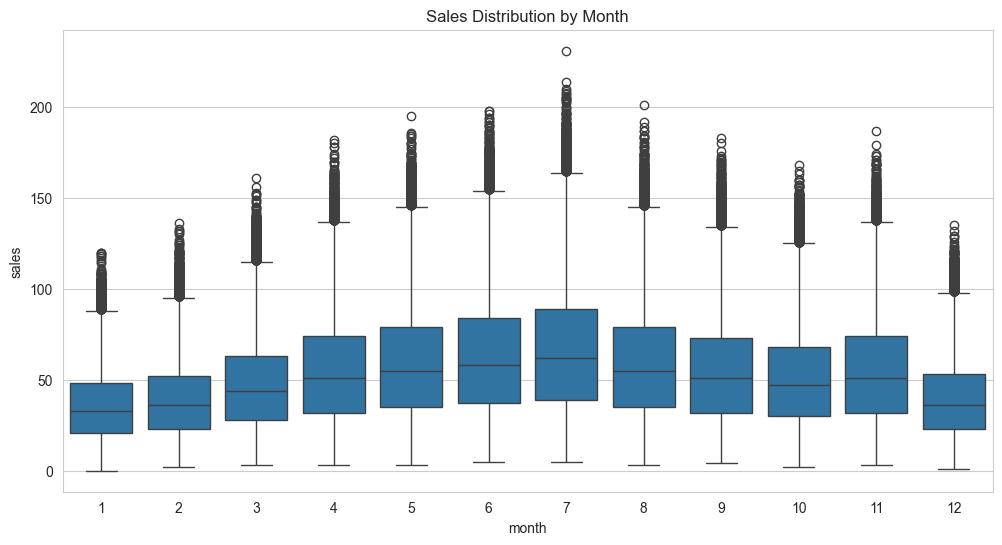

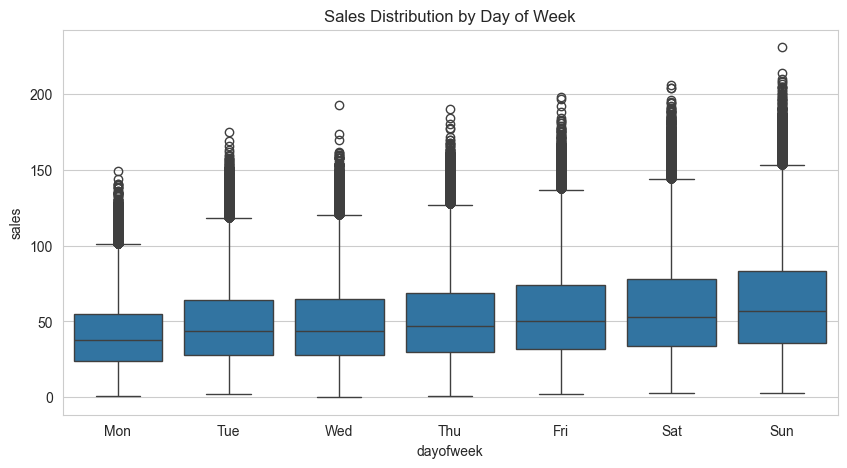

In [5]:
# Sales by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='sales', data=df)
plt.title('Sales Distribution by Month')
plt.show()

# Sales by Day of Week
plt.figure(figsize=(10, 5))
sns.boxplot(x='dayofweek', y='sales', data=df)
plt.title('Sales Distribution by Day of Week')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

### Analysis of Sales Distribution by Month

This boxplot confirms that there is a strong annual seasonality in sales.

1. **Summer Peak**: Sales consistently peak in July. Both the median sales and the overall sales volume, indicated by the size of the box, are at their highest during this month.

2. **Winter Low**: The lowest sales period is during the winter, specifically in January and February.

2. **Increased Variability**: The summer months show a wider spread of sales, shown by the longer whiskers and number of outliers, indicating higher volatility during the peak season.

This pattern must be a key feature in the forecasting model.

### Analysis of Sales Distribution by Day of Week

This boxplot reveals a strong and predictable weekly sales cycle.

1. **Clear Weekend Peak**: Sales steadily increase throughout the week, culminating on Saturday and Sunday, which are consistently the highest sales days. Monday is the slowest day of the week.

2. **Higher Weekend Variability**: The spread of sales is noticeably larger on the weekend. This indicates higher volatility and a wider range of possible sales outcomes on busy days.

This distinct weekly pattern is a critical feature that the forecasting model must capture.

## Summary and Key Findings

The exploratory data analysis reveals that the sales data is driven by three key components:

1.  **A consistent upward trend**, indicating overall business growth.
2.  **Strong annual seasonality**, with sales peaking in the summer (July).
3.  **A predictable weekly cycle**, with sales increasing toward the weekend and peaking on Sunday.

Any successful forecasting model must be able to account for these three patterns.